In [1]:
import numpy as np
from numpy import sin, cos, arctan
import matplotlib.pyplot as plt
%matplotlib inline

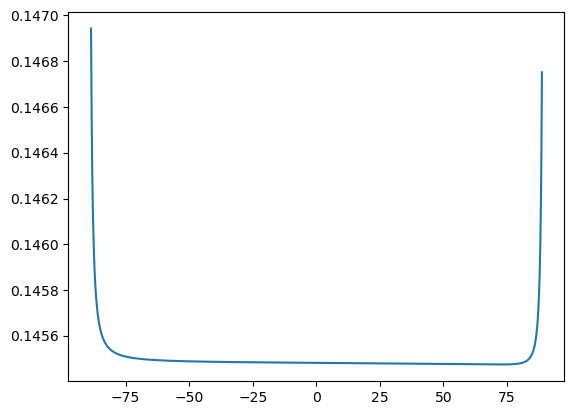

In [2]:
def getKernel(rinKm, ellinKm, UAREA):
    G = (0.5 - 0.5*np.tanh((rinKm - ellinKm/2)/10))
    normalization = np.nansum(G*UAREA)
    kernel = G/normalization
    return kernel 

def getConst(rInKm, X, Y, UAREA, ellInKm):
    kernel = getKernel(rInKm, ellInKm, UAREA)
    intgX = np.nansum(X**2 * UAREA * kernel)/(ellInKm*1e3)**2 
    intgY = np.nansum(Y**2 * UAREA * kernel)/(ellInKm*1e3)**2 
    intgXY = np.nansum(X*Y * UAREA * kernel)/(ellInKm*1e3)**2 
    intgYX = np.nansum(Y*X * UAREA * kernel)/(ellInKm*1e3)**2 
    return (intgX+intgY)

def getConstAtLat(latIn, ellInKm):
    R = 6.371e6
    
    tolerance = 100
    
    tot_latRange = np.rad2deg((ellInKm + tolerance)*1e3/R)
    #print('del lat = ', tot_latRange)
    #nlat = int(tot_latRange//0.01)#+5)
    nlat = 250
    #print('nlat', nlat)
    lat = np.linspace(latIn-tot_latRange/2,latIn+tot_latRange/2,nlat)
    #print('lat range', lat[0], lat[-1])
    
    tot_lonRange = np.rad2deg((ellInKm + tolerance)*1e3/(R*cos(np.deg2rad(latIn))))
    #print('del lon = ', tot_lonRange)
    #nlon = int(tot_lonRange//0.01)#+5)
    nlon = 250
    #print( 'nlon = ', nlon)
    lon = np.linspace(-tot_lonRange/2,tot_lonRange/2,nlon)
    #print('lon range', lon[0],lon[-1])
    #plt.plot(lon)
    
    dlon = lon[1] - lon[0]
    dlat = lat[1] - lat[0]
    
    XX, YY = np.meshgrid(lon, lat)

    phi2 = np.deg2rad(YY)
    phi1 = np.deg2rad(np.ones(YY.shape) * np.mean(lat))
    dlambda = np.deg2rad(XX - np.mean(lon))
    num = np.sqrt((cos(phi2) * sin(dlambda))**2 +(cos(phi1)* sin(phi2) - sin(phi1)*cos(phi2)* cos(dlambda))**2)
    den = (sin(phi1)*sin(phi2) + cos(phi1)*cos(phi2) * cos(dlambda))
    dsigma = np.arctan2(num,den)
    r = R*dsigma
#     plt.contourf(XX, YY, r/1e3, levels=20, cmap='tab20c')
#     plt.colorbar()

    DX = R*cos(np.deg2rad(YY))*np.deg2rad(dlon) 
    DY = R*np.deg2rad(dlat) * np.ones(np.shape(DX))
    UAREA = DX * DY

    X = np.cumsum(DX, axis = 1)
    Y = np.cumsum(DY, axis = 0)

    X = X - np.array(nlon *[X[:,-1]/2]).T
    Y = Y - np.array(nlat *[Y[-1, :]/2])

    cnst =  getConst(r/1e3, X, Y, UAREA, ellInKm)
    #print('\n\n')
    return cnst


lat = np.arange(-89.875,90,0.05)
ylen = len(lat)
#lat = lat[2:-2]

constArr = np.zeros((ylen), dtype=float)
for i in range(ylen):
    constArr[i] =  getConstAtLat(lat[i], 100)
    
n=25
plt.plot(lat[n:-n], constArr[n:-n])

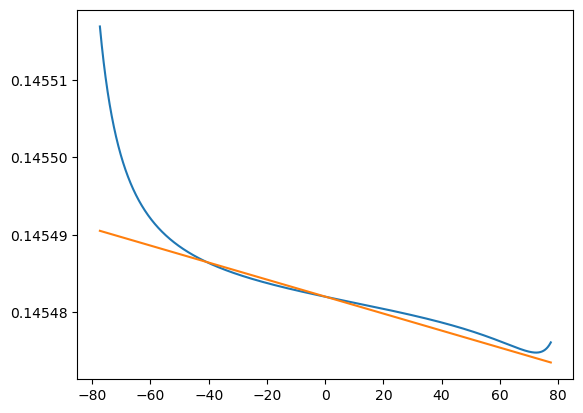

In [3]:
c = 0.145482
m = -0.00000011
n=250
plt.plot(lat[n:-n], constArr[n:-n])
plt.plot(lat[n:-n], m*lat[n:-n] + c)

In [4]:
min(constArr[n:-n])

0.14547475663666504

In [6]:
getConstAtLat(0, 60)

0.18139585889456428